SIN-392 - Introduction to Digital Image Processing (2022-1)

# Lecture 13 - The Fourier transform

Prof. João Fernando Mari ([*joaofmari.github.io*](https://joaofmari.github.io/))

---

## Importing the libraries
---

In [1]:
import numpy as np
from numpy import fft

import matplotlib.pyplot as plt

### %matplotlib notebook

## Creating a simple signal
----

* A sinusoidal signal with a frequency of 10 Hz, amplitude of 1 and duration of 4 seconds.
*The signal was sampled at a rate of 100 samples per second.

In [2]:
# Signal frequency, in Hz (cycles per seconds)
freq_signal = 10 

# Sampling rate. Number of samples per second
taxa_amostragem = 100 

# Sampling frequency
freq_amostragem = 1 / taxa_amostragem

# Signal duration (in seconds)
duracao_sinal = 2

# Number of samples
num_amostras = duracao_sinal * taxa_amostragem

# Time axis (in seconds)
tempo = np.linspace(0, duracao_sinal, num_amostras, endpoint=False)

# Sinusoidal Signal
sinal = np.sin(freq_signal * 2*np.pi * tempo)

### Plotting the signal

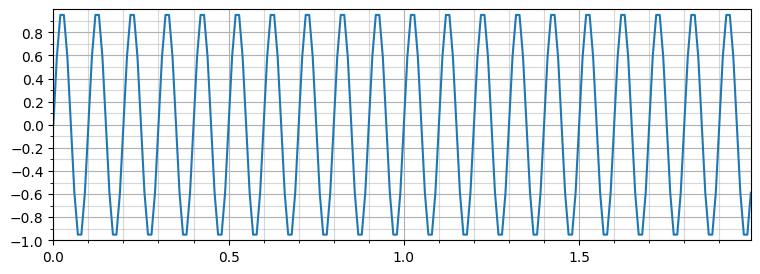

In [3]:
fig = plt.figure(figsize=(9, 3))
plt.plot(tempo, sinal)

plt.autoscale(enable=True, axis='both', tight=True)
ax = fig.gca()
ax.set_xticks(np.arange(0, 2.0, 0.5))
ax.set_xticks(np.arange(0, 2.0, 0.1), minor=True)
ax.set_yticks(np.arange(-1, 1.0, 0.2), minor=False)
ax.set_yticks(np.arange(-1, 1.0, 0.1), minor=True)
## ax.set_aspect('equal')
ax.grid(which='major', alpha=1.0)
ax.grid(which='minor', alpha=0.5)
ax.set_ylim(-1, 1)

## plt.axis('equal')
plt.show()

The Discrete Fourier Transform
----

* 1D Discrete Fourier Transform:
<font size="5">
$$F(u) = \sum_{x=0}^{M-1}{f(x)e^{-j2 \pi ux \over{M}}}$$
</font>
<br />
<br />
* 1D Inverse Discrete Fourier Transform:
<font size="5">
$$f(x) = {1 \over{M}} \sum_{u=0}^{M-1}{F(u)e^{j2 \pi ux \over{M}}}$$
</font>

In [4]:
def DFT_slow(fx):
    """Compute the discrete Fourier transform of a function f_x.
    
    References
    ----------
    - https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/
    """
    # Ensures that the signal f(x) is in a NumPy array of type float
    fx = np.array(fx, dtype=float)
    
    # Signal size (number of samples)
    M = fx.shape[0]
    
    # Time axis. From 0 to M
    x = np.arange(M)
    ### print('x: ' + str(x))
    
    # Frequency axis (in Hz, cycles per second)
    u = x.reshape((M, 1))
    ### print('u: ' + str(u.shape))
    
    M = np.exp(-1j * 2 * np.pi * u * x / M)
    ### print('M')
    ### print(M)
    
    # Inner product between M and f(x)
    dft = np.dot(M, fx)
    ### print('dft')
    ### print(dft)
    
    return dft

### Calculates the DFT of a simple function.


[5.40000000e+01 3.27844930e-15 3.94324822e+00 4.13176028e-15
 4.47213595e+00 1.24745797e-14 1.62619431e+01 1.24844567e-14
 6.00000000e+00 2.37629227e-14 1.62619431e+01 3.62483992e-14
 4.47213595e+00 2.16308373e-14 3.94324822e+00 9.11119797e-14]


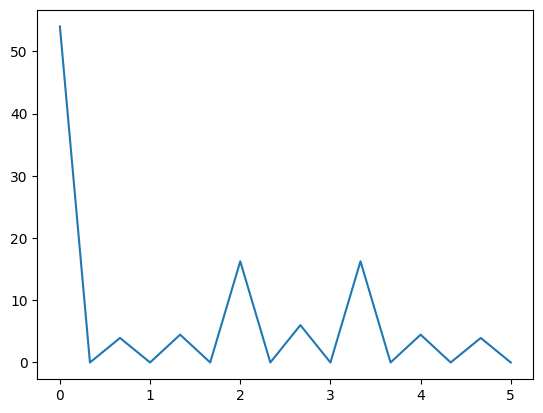

In [5]:
# Computing for a simple signal
a=[4, 2, 3, 6, 1, 5, 4, 2, 4, 2, 3, 6, 1, 5, 4, 2]

# Number of samples
M = len(a)

# Sampling frequency
freq = 1 / 10 # 10 amostras por segundo

# y-axis (F(u))
b_y = DFT_slow(a)

# Fourier spectrum. |F(u)|
print(np.abs(b_y))

# x-axis (u)
### b_x = np.linspace(0, 1/(2 * (1/10)), 16)
b_x = np.linspace(0, 1/(2 * freq), M)

plt.figure()
plt.plot(b_x, np.abs(b_y))

plt.show()

#### Compares the results of the discrete Fourier transform with the FFT (NumPy)

In [6]:
# Discrete Fourier Transform (slow)
x_slow = DFT_slow(sinal)

# FFT - Fast Fourier Transform
x_np = np.fft.fft(sinal)

# Checks if the signals are similar.
np.allclose(x_slow, x_np)

True

#### Compare the execution times

In [7]:
# Discrete Fourier Transform (slow)
%timeit DFT_slow(sinal)

# FFT - Fast Fourier Transform
%timeit np.fft.fft(sinal)

4.81 ms ± 292 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10.4 µs ± 207 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### Applying the Fourier Transform to a 1D signal

* Using the implementation in NumPy

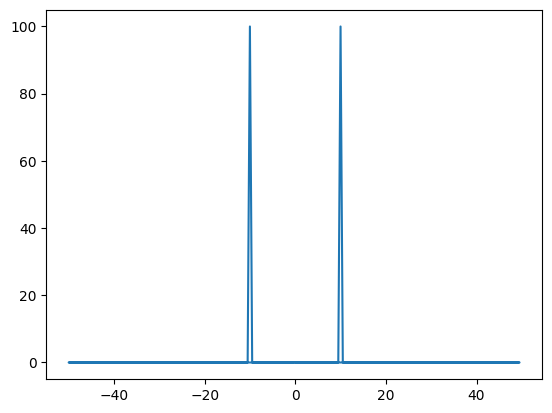

In [8]:
sinal_fft_y = fft.fft(sinal)
sinal_fft_x = fft.fftfreq(num_amostras, freq_amostragem)

plt.figure()
plt.plot(sinal_fft_x, np.abs(sinal_fft_y))
plt.show()

## Creating a more complex signal
----
- Let's create a more complex signal, composed of the sum of three sinusoidal signals with different amplitudes and frequencies.
     - Signal 1:
         - Frequency: 5 Hz
         - Amplitude: 8
     - Signal 2:
         - Frequency: 20 Hz
         - Amplitude: 6
     - Signal 3:
         - Frequency: 60 Hz
         - Amplitude: 4
     - Signal 4:
         - Frequency: 80 Hz
         - Amplitude: 5

In [9]:
# Signal frequency, in Hz (cycles per seconds)
freq_signal_list = [5, 10, 40, 60] 

# List of amplitudes
amp_list = [8, 6, 4, 5]

# Sampling rate. Number of samples per second
taxa_amostragem = 400 

# Sampling frequency
freq_amostragem = 1 / taxa_amostragem

# Signal duration (in seconds)
duracao_sinal = 2

# Number of samples
num_amostras = duracao_sinal * taxa_amostragem

# Time axis (in seconds)
tempo = np.linspace(0, duracao_sinal, num_amostras, endpoint=False)

# List of partial signals
sinal_parc_list = []

# Signal
sinal = np.zeros(num_amostras, dtype=float)

for freq, amp in zip(freq_signal_list, amp_list):
    # Sinusoidal Signal
    sinal_parc = np.sin(freq * 2*np.pi * tempo) * amp
    sinal_parc_list.append(sinal_parc)
    sinal = sinal + sinal_parc

### Plotting the signal

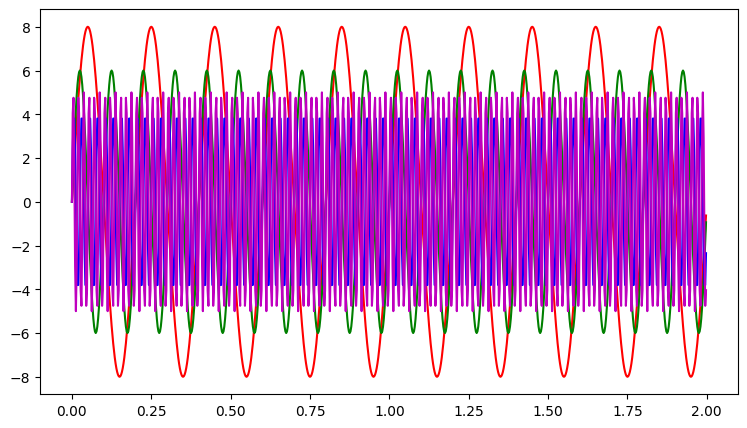

In [10]:
plt.figure(figsize=(9, 5))
plt.plot(tempo, sinal_parc_list[0], color='r')
plt.plot(tempo, sinal_parc_list[1], color='g')
plt.plot(tempo, sinal_parc_list[2], color='b')
plt.plot(tempo, sinal_parc_list[3], color='m')

plt.show()

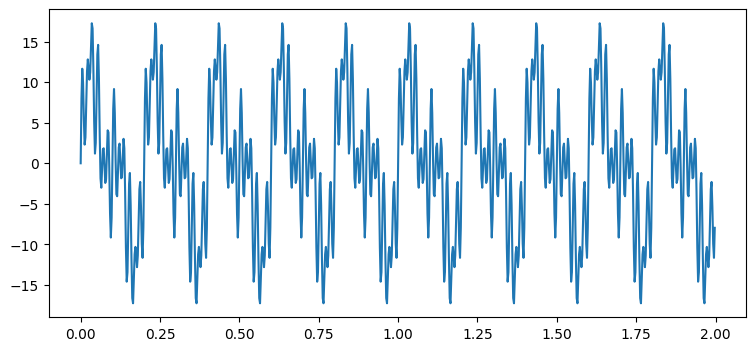

In [11]:
plt.figure(figsize=(9, 4))
plt.plot(tempo, sinal)
plt.show()

## Computing the Fourier Transform of the signal

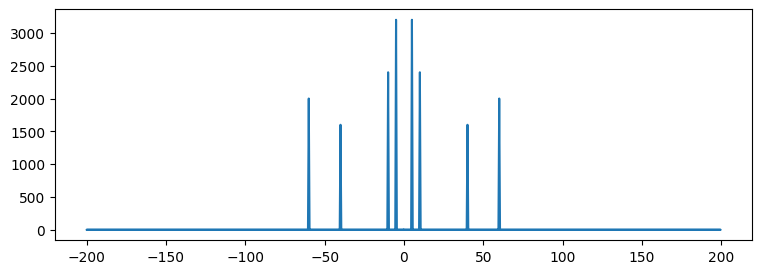

In [12]:
sinal_fft_y = fft.fft(sinal)
sinal_fft_x = fft.fftfreq(num_amostras, freq_amostragem)

plt.figure(figsize=(9, 3))
plt.plot(sinal_fft_x, np.abs(sinal_fft_y))
plt.show()

### Filtering the high frequencies (low pass filtering)

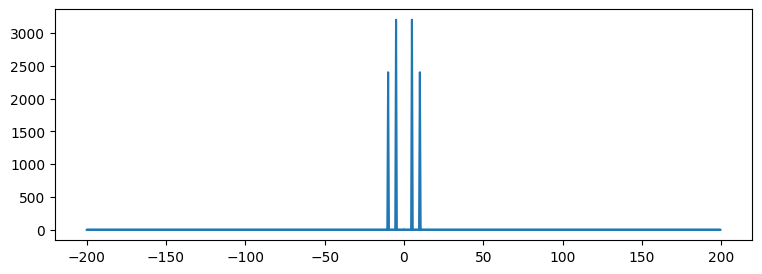

In [13]:
sinal_pb = sinal_fft_y.copy()
sinal_pb[np.abs(sinal_fft_x) > 30] = 0

plt.figure(figsize=(9, 3))
plt.plot(sinal_fft_x, np.abs(sinal_pb))
plt.show()

C:\Users\joaof\anaconda3\envs\env-sin392-cpu-py39\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\joaof\anaconda3\envs\env-sin392-cpu-py39\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


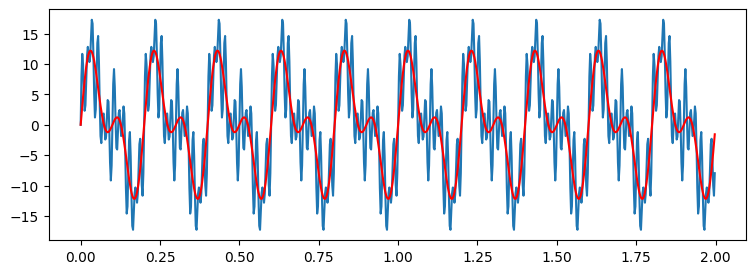

In [14]:
sinal_pb_ifft = fft.ifft(sinal_pb)

plt.figure(figsize=(9, 3))
plt.plot(tempo, sinal)
plt.plot(tempo, sinal_pb_ifft, color='red')
plt.show()

### Filtering the low frequencies (high-pass filtering)

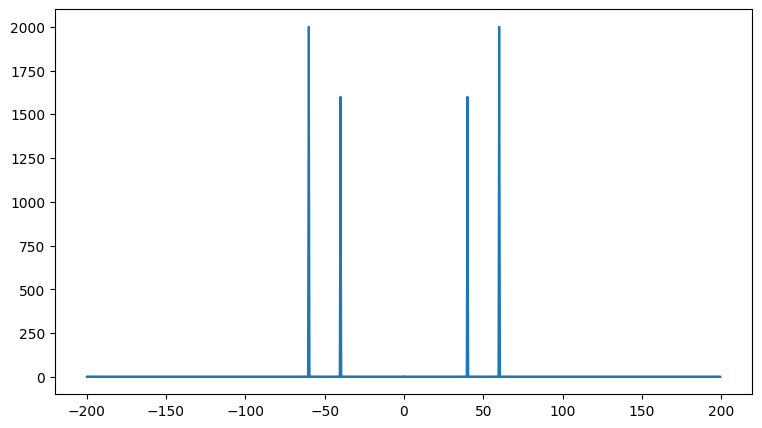

In [15]:
sinal_pa = sinal_fft_y.copy()
sinal_pa[np.abs(sinal_fft_x) < 30] = 0

plt.figure(figsize=(9, 5))
plt.plot(sinal_fft_x, np.abs(sinal_pa))
plt.show()

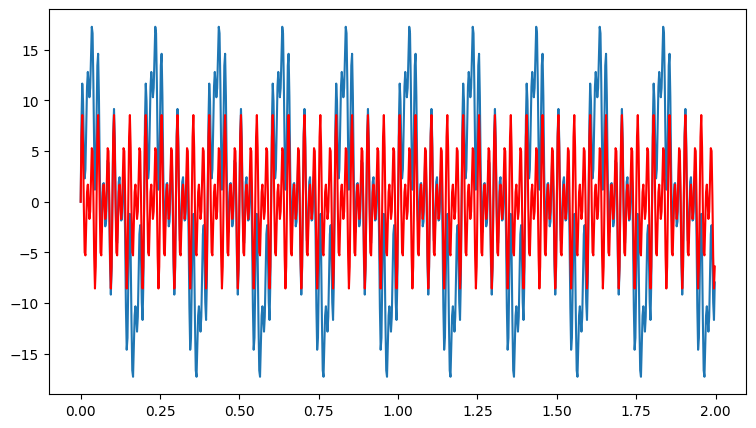

In [16]:
sinal_pa_ifft = fft.ifft(sinal_pa)

plt.figure(figsize=(9, 5))
plt.plot(tempo, sinal)
plt.plot(tempo, sinal_pa_ifft, color='red')
plt.show()

## Bibliography
----

* GONZALEZ, R.C.; WOODS, R.E.; Digital Image Processing. 3rd edition. Pearson, 2009.
* MARQUES FILHO, O.; VIEIRA NETO, H. Processamento digital de imagens. Brasport, 1999.
    * In Brazilian Portuguese.
    * Available for download on the author's website (Personal use only).
    * http://dainf.ct.utfpr.edu.br/~hvieir/pub.html  
* J. E. R. Queiroz, H. M. Gomes. Introdução ao Processamento Digital de Imagens. RITA. v. 13, 2006.
    * In Brazilian Portuguese.
    * http://www.dsc.ufcg.edu.br/~hmg/disciplinas/graduacao/vc-2016.2/Rita-Tutorial-PDI.pdf  
* Gaël Varoquaux Emmanuelle Gouillart; Olav Vahtras; Pierre de Buyl (editores). Scipy Lecture Notes. Release 2020.1
    * Disponível em: http://scipy-lectures.org/
* scikit-image. Documentation.
    * https://scikit-image.org/docs/dev/index.html
* NumPy. Documentation.
    * https://numpy.org/doc/stable/
* Plotting and manipulating FFTs for filtering
    * https://scipy-lectures.org/intro/scipy/auto_examples/plot_fftpack.html
* Cory Maklin. Fast Fourier Transform: How to implement the Fast Fourier Transform algorithm in Python from scratch.
    * https://towardsdatascience.com/fast-fourier-transform-937926e591cb
* Understanding the FFT Algorithm 
    * https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/
* Digital Image Processing using Fourier Transform in Python
    * https://medium.com/@hicraigchen/digital-image-processing-using-fourier-transform-in-python-bcb49424fd82